In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anastasiakozhina","key":"a9a27a37783de782adc884e60cd932bc"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download abhinavwalia95/entity-annotated-corpus

 72% 19.0M/26.4M [00:00<00:00, 195MB/s]
100% 26.4M/26.4M [00:00<00:00, 216MB/s]


In [ ]:
! unzip entity-annotated-corpus

Archive:  entity-annotated-corpus.zip
  inflating: ner.csv                 
  inflating: ner_dataset.csv         


In [ ]:
import pandas as pd
data = pd.read_csv('ner_dataset.csv', encoding= 'unicode_escape')
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [ ]:
data.POS.value_counts()

NN      145807
NNP     131426
IN      120996
DT       98454
JJ       78412
NNS      75840
.        47831
VBD      39379
,        32757
VBN      32328
VBZ      24960
CD       24695
VB       24211
CC       23716
TO       23061
RB       20252
VBG      19125
VBP      16158
PRP      13318
POS      11257
PRP$      8655
MD        6973
``        3728
WDT       3698
JJS       3034
JJR       2967
WP        2542
NNPS      2521
RP        2490
WRB       2184
$         1149
RBR       1055
:          795
RRB        679
LRB        678
EX         663
RBS        296
;          214
PDT        147
WP$         99
UH          24
FW           1
Name: POS, dtype: int64

In [ ]:
data.Tag.value_counts()

O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: Tag, dtype: int64

In [ ]:
len(data[data['Tag']=='O'])/len(data)

0.8467758624800324

In [ ]:
#from itertools import chain
def get_dict_map(data, token_or_tag):
    tok2idx = {}
    idx2tok = {}

    if token_or_tag == 'token':
        vocab = list(set(data['Word'].to_list()))
    else:
        vocab = list(set(data['Tag'].to_list()))

    idx2tok = {idx:tok for  idx, tok in enumerate(vocab)}
    tok2idx = {tok:idx for  idx, tok in enumerate(vocab)}
    return tok2idx, idx2tok


token2idx, idx2token = get_dict_map(data, 'token')
tag2idx, idx2tag = get_dict_map(data, 'tag')

In [ ]:
tag2idx

{'B-tim': 0,
 'I-nat': 1,
 'B-art': 2,
 'I-tim': 3,
 'I-art': 4,
 'B-eve': 5,
 'I-eve': 6,
 'B-gpe': 7,
 'B-geo': 8,
 'B-per': 9,
 'B-org': 10,
 'I-per': 11,
 'I-org': 12,
 'I-geo': 13,
 'I-gpe': 14,
 'B-nat': 15,
 'O': 16}

In [ ]:
idx2tag

{0: 'B-tim',
 1: 'I-nat',
 2: 'B-art',
 3: 'I-tim',
 4: 'I-art',
 5: 'B-eve',
 6: 'I-eve',
 7: 'B-gpe',
 8: 'B-geo',
 9: 'B-per',
 10: 'B-org',
 11: 'I-per',
 12: 'I-org',
 13: 'I-geo',
 14: 'I-gpe',
 15: 'B-nat',
 16: 'O'}

In [ ]:
data['Word_idx'] = data['Word'].map(token2idx)
data['Tag_idx'] = data['Tag'].map(tag2idx)
data.head()

,Sentence #,Word,POS,Tag,Word_idx,Tag_idx
0,Sentence: 1,Thousands,NNS,O,15170,16
1,NaN,of,IN,O,17768,16
2,NaN,demonstrators,NNS,O,8441,16
3,NaN,have,VBP,O,7266,16
4,NaN,marched,VBN,O,10115,16


In [ ]:
# Заполнение пропусков
data_fillna = data.fillna(method='ffill', axis=0)
# Группируем
data_group = data_fillna.groupby(
['Sentence #'],as_index=False
)['Word', 'POS', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))

data_group.head()

<ipython-input-34-f337cd42db8c>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_group = data_fillna.groupby(


,Sentence #,Word,POS,Tag,Word_idx,Tag_idx
0,Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[15170, 17768, 8441, 7266, 10115, 4008, 19634,...","[16, 16, 16, 16, 16, 16, 8, 16, 16, 16, 16, 16..."
1,Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[JJ, NNS, VBP, PRP, VBP, TO, VB, NN, TO, JJ, J...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[27794, 206, 8611, 26801, 25464, 17065, 1049, ...","[7, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16..."
2,Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[NN, NNS, NNP, VBD, JJ, NNS, IN, DT, NNP, JJ, ...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...","[6238, 19256, 22769, 1838, 28879, 8988, 5047, ...","[16, 16, 0, 16, 16, 16, 16, 16, 8, 16, 16, 16,..."
3,Sentence: 1000,"[They, left, after, a, tense, hour-long, stand...","[PRP, VBD, IN, DT, NN, JJ, NN, IN, NN, NNS, .]","[O, O, O, O, O, O, O, O, O, O, O]","[5272, 4608, 27060, 28850, 2009, 12240, 12752,...","[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]"
4,Sentence: 10000,"[U.N., relief, coordinator, Jan, Egeland, said...","[NNP, NN, NN, NNP, NNP, VBD, NNP, ,, NNP, ,, J...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...","[7510, 16487, 9104, 3775, 10061, 3188, 22470, ...","[8, 16, 16, 9, 11, 16, 0, 16, 8, 16, 7, 16, 7,..."


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
def get_pad_train_test(data_group, data):

    n_token = len(list(set(data['Word'].to_list())))
    n_tag = len(list(set(data['Tag'].to_list())))

    tokens = data_group['Word_idx'].tolist()
    maxlen = max([len(s) for s in tokens])
    pad_tokens = pad_sequences(tokens, maxlen=maxlen, dtype='int32', padding='post', value= n_token - 1)

    tags = data_group['Tag_idx'].tolist()
    pad_tags = pad_sequences(tags, maxlen=maxlen, dtype='int32', padding='post', value= tag2idx["O"])
    n_tags = len(tag2idx)
    pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]

    train_tokens, test_tokens, train_tags, test_tags = train_test_split(pad_tokens, pad_tags, test_size=0.2, train_size=0.8, random_state=2023)

    print(
        'train_tokens length:', len(train_tokens),
        '\ntest_tokens length:', len(test_tokens),
        '\ntest_tags:', len(test_tags),
        '\ntrain_tags:', len(train_tags),
    )

    return train_tokens, test_tokens, train_tags, test_tags

train_tokens, test_tokens, train_tags, test_tags = get_pad_train_test(data_group, data)

train_tokens length: 38367 
test_tokens length: 9592 
test_tags: 9592 
train_tags: 38367


In [ ]:
import numpy as np
import tensorflow
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.utils import plot_model

In [ ]:
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)

In [ ]:
input_dim = len(list(set(data['Word'].to_list())))+1
output_dim = 64
input_length = max([len(s) for s in data_group['Word_idx'].tolist()])
n_tags = len(tag2idx)
print('input_dim: ', input_dim, '\noutput_dim: ', output_dim, '\ninput_length: ', input_length, '\nn_tags: ', n_tags)

input_dim:  35179 
output_dim:  64 
input_length:  104 
n_tags:  17


In [ ]:
def get_bilstm_lstm_model():
    model = Sequential()

    # Слой Embedding
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))

    # Слой bidirectional LSTM
    model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True)))
    # Слой LSTM
    model.add(LSTM(units=output_dim, return_sequences=True))

    # Слой timeDistributed Layer (обеспечивает выход формата many-to-many)
    model.add(TimeDistributed(Dense(n_tags, activation="softmax")))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()

    return model

In [ ]:
def train_model(X, y, model):
    loss = list()
    for i in range(3):
        hist = model.fit(X, y, batch_size=128, verbose=1, epochs=1, validation_split = 0.2)
        loss.append(hist.history['loss'][0])
    return loss

In [ ]:
results = pd.DataFrame()
model_bilstm_lstm = get_bilstm_lstm_model()
results['with_add_lstm'] = train_model(train_tokens, np.array(train_tags), model_bilstm_lstm)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 104, 64)           2251456   
                                                                 
 bidirectional_1 (Bidirecti  (None, 104, 128)          66048     
 onal)                                                           
                                                                 
 lstm_3 (LSTM)               (None, 104, 64)           49408     
                                                                 
 time_distributed_1 (TimeDi  (None, 104, 17)           1105      
 stributed)                                                      
                                                                 
Total params: 2368017 (9.03 MB)
Trainable params: 2368017 (9.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
240/240 [=======

In [ ]:
predict = model_bilstm_lstm.predict(test_tokens)

300/300 [==============================] - 16s 51ms/step


In [ ]:
model_bilstm_lstm.evaluate(test_tokens,np.array(test_tags))

300/300 [==============================] - 17s 56ms/step - loss: 0.0560 - accuracy: 0.9832


[0.056016918271780014, 0.9831961393356323]

In [ ]:
train_tokens.shape, test_tokens.shape, np.array(train_tags).shape, np.array(test_tags).shape

((38367, 104), (9592, 104), (38367, 104, 17), (9592, 104, 17))

In [ ]:
train_tags = np.array(train_tags)
test_tags = np.array(test_tags)

In [ ]:
predicted_tags = np.argmax(predict, axis=-1)
predicted_tags = [[idx2tag[tag] for tag in sample] for sample in predicted_tags]
flatten_predicted = [tag for sample in predicted_tags for tag in sample]
flatten_true = [idx2tag[np.argmax(tag)] for sample in test_tags for tag in sample]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

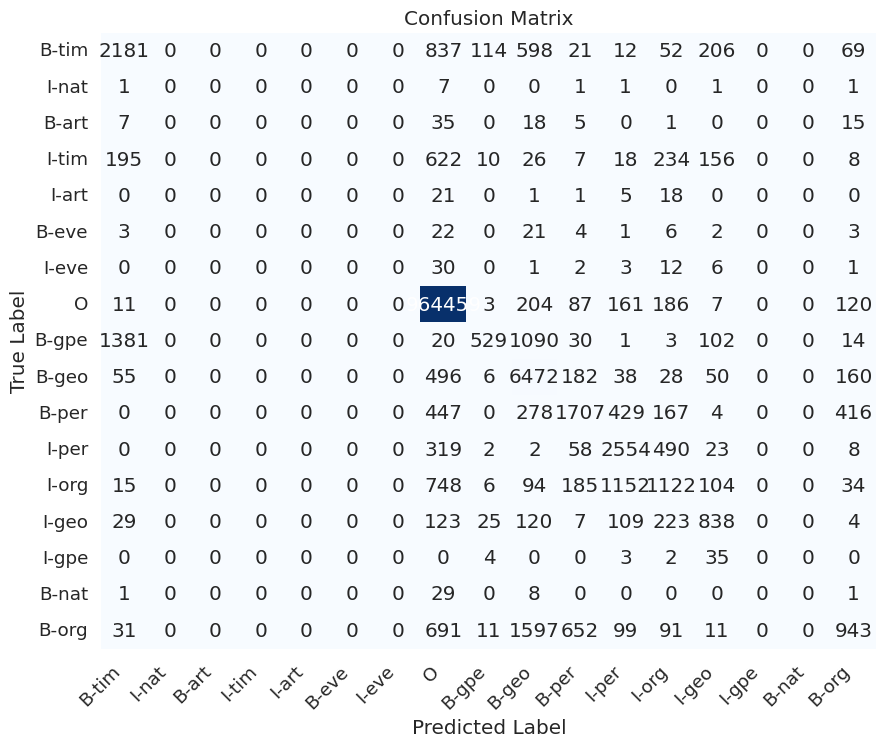

In [ ]:
unique_tags = list(set(flatten_true + flatten_predicted))
cm = confusion_matrix(flatten_true, flatten_predicted, labels=unique_tags)
cm_df = pd.DataFrame(cm, index=unique_tags, columns=unique_tags)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)

sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d", cbar=False)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(flatten_predicted, flatten_true)
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00         0
       B-eve       0.00      0.00      0.00         0
       B-geo       0.86      0.61      0.72     10530
       B-gpe       0.17      0.75      0.27       710
       B-nat       0.00      0.00      0.00         0
       B-org       0.23      0.52      0.32      1797
       B-per       0.50      0.58      0.53      2949
       B-tim       0.53      0.56      0.55      3910
       I-art       0.00      0.00      0.00         0
       I-eve       0.00      0.00      0.00         0
       I-geo       0.57      0.54      0.55      1545
       I-gpe       0.00      0.00      0.00         0
       I-nat       0.00      0.00      0.00         0
       I-org       0.32      0.43      0.37      2635
       I-per       0.74      0.56      0.64      4586
       I-tim       0.00      0.00      0.00         0
           O       1.00      1.00      1.00    968906

    accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
num = 90
np.argmax(predict[num], axis=1)

array([ 8, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16])

In [ ]:
np.argmax(test_tags[num], axis=1)

array([ 8, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16])